# Introducción a Redes Neuronales

Cuando estamos trabajando con Deep Learning, una de las herramientas más poderosas y versátiles que tenemos a nuestra disposición son las **Redes Neuronales**. Estas estructuras computacionales están inspiradas en el funcionamiento del cerebro humano y son capaces de aprender patrones complejos a partir de grandes cantidades de datos. En este cuaderno de jypiter, vamos a explorar los conceptos básicos de las redes neuronales, cómo diseñarlas, entrenarlas y evaluarlas utilizando la biblioteca PyTorch. Para enseñar a una red a ver una imagen y clasificarla, necesitamos seguir varios pasos clave que nos ayudarán a construir un modelo efectivo.

Para disenar y entrenar redes, me gusta seguir un framework que me ayuda a organizar el proceso de manera sistemática. Este framework consta de los siguientes pasos:

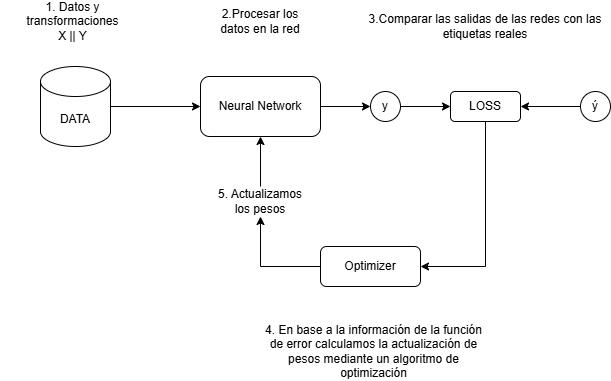

1. **Datos y transformaciones**: El primer paso es preparar los datos que vamos a utilizar para entrenar la red. Esto incluye cargar los datos, aplicar transformaciones necesarias (como normalización, aumento de datos, etc.) y dividirlos en conjuntos de entrenamiento y test. Suele ser comun dividir los datos en un 80% para entrenamiento y un 20% para test.
    ```python
    import torch # PyTorch
    from torchvision import datasets, transforms # Datasets y Transformaciones (Para la parte de datos)
    from torch.utils.data import DataLoader # Para cargar los datos en la red
    ```
2. **Definir la red**: A continuación, definimos la arquitectura de la red neuronal. Esto implica decidir el número de capas, el tipo de capas (convolucionales, lineales, etc.), las funciones de activación y cómo se conectan entre sí.
    ```python
    from torch import nn, optim # Para crear la red y el optimizador
    import torch.nn.functional as F # Funciones de activación y pérdida
    class SimpleNN(nn.Module):
        def __init__(self):
            super(SimpleNN, self).__init__()
            self.fc1 = nn.Linear(784, 128)
            self.fc2 = nn.Linear(128, 10)

        def forward(self, x):
            x = F.relu(self.fc1(x))
            x = self.fc2(x)
            return x
    ```
3. **Definir la función de pérdida y el optimizador**: La función de pérdida mide qué tan bien está funcionando la red, mientras que el optimizador ajusta los pesos de la red para minimizar la pérdida.
    ```python
    model = SimpleNN()
    criterion = nn.CrossEntropyLoss() # Función de pérdida
    optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9) # Optimizador
    ```
4. **Entrenar la red**: En este paso, alimentamos los datos de entrenamiento a la red, calculamos la pérdida, y actualizamos los pesos utilizando el optimizador. Este proceso se repite durante varias épocas.
    ```python
    for epoch in range(num_epochs):
        for inputs, labels in train_loader:
            optimizer.zero_grad() # Limpiar los gradientes
            outputs = model(inputs) # Forward pass
            loss = criterion(outputs, labels) # Calcular la pérdida
            loss.backward() # Backward pass
    ```

5. **Actualizar la red**: Durante el entrenamiento, los pesos de la red se actualizan en cada iteración para minimizar la función de pérdida. Este proceso es crucial para que la red aprenda a realizar la tarea deseada.
    ```python
    optimizer.step() # Actualizar los pesos
    ```
6. **Evaluar la red**: Finalmente, evaluamos el rendimiento de la red utilizando el conjunto de test. Esto nos permite ver qué tan bien generaliza la red a datos nuevos.
    ```python
    correct = 0
    total = 0
    with torch.no_grad():
        for inputs, labels in test_loader:
            outputs = model(inputs)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    print(f'Accuracy: {100 * correct / total}%')
    ```


In [1]:
import torch # PyTorch
from torchvision import datasets, transforms # Datasets y Transformaciones (Para la parte de datos)
from torch.utils.data import DataLoader # Para cargar los datos en la red
from torch import nn, optim # Para crear la red y el optimizador
import torch.nn.functional as F # Funciones de activación y pérdida

In [2]:
# Cargar y preprocesar los datos del MNIST
BATCH_SIZE = 64
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))]) # Normalización
train_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform) # Datos de entrenamiento
test_dataset = datasets.MNIST(root='./data', train=False, download=True, transform=transform) # Datos de prueba
train_loader = DataLoader(
    train_dataset, # Cargador de datos de entrenamiento
    batch_size=BATCH_SIZE, # Tamaño del batch
    shuffle=True # Barajar los datos (Ayuda a mejorar el entrenamiento)
) # Cargador de datos de entrenamiento
test_loader = DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=False) # Cargador de datos de prueba

100%|██████████| 9.91M/9.91M [00:02<00:00, 4.82MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 244kB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 1.86MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 6.32MB/s]


Siempre en Pytorch para trabajar con los datos se tiene que tene dos clases principales: `Dataset` y `DataLoader`. El primero se encarga de manejar los datos y el segundo de cargarlos en la red en mini-batches. Aquí hay un ejemplo de cómo cargar y preprocesar los datos del MNIST:
```python# Cargar y preprocesar los datos del MNIST
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))]) # Normalización
train_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform) # Datos de entrenamiento
test_dataset = datasets.MNIST(root='./data', train=False, download=True, transform=transform) # Datos de prueba
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True) # Cargador de datos de entrenamiento
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False) # Cargador de datos de prueba
```


Uno de los hiperparametros más importantes es el tamaño del batch (**BATCH_SIZE**), que es el número de muestras que se procesan antes de actualizar los pesos de la red. Un tamaño de batch comúnmente utilizado es 64, pero puede variar dependiendo del problema y los recursos computacionales disponibles. Es decir no procesar todos los datos de entrenamiento a la vez, sino en pequeños lotes, lo que ayuda a estabilizar el proceso de entrenamiento y puede mejorar la convergencia.

La normalización de las imágenes se realiza restando la media y dividiendo por la desviación estándar.

$imagen = \frac{imagen - media}{desviación\ estándar}$


Así que si los valores de las imágenes están entre 0 y 1, cuando el valor sea 0 (mínimo) se convertirá en -1 y cuando sea 1 (máximo) se convertirá en 1.

```python
transforms.Normalize(
    (0.5,), # media 0.5
    (0.5,) # desviación estándar 0.5
)
```




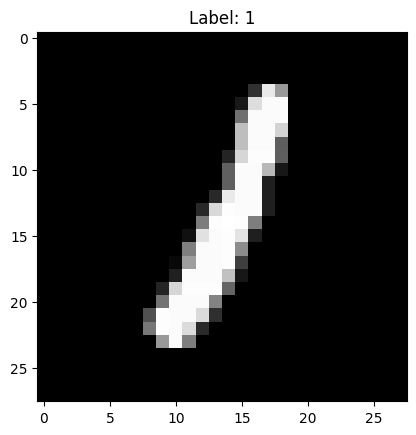

In [3]:
# Aqui mostramos una imagen del dataset
import matplotlib.pyplot as plt # Para mostrar la imagen uso matplotlib (otra librería muy usada en Python)

INDEX = 0

def imshow(img, label):
    img = img / 2 + 0.5     # Desnormalizar
    plt.imshow(img.squeeze(), cmap='gray')
    plt.title(f'Label: {label}')
    plt.show()
    
dataiter = iter(train_loader)
images, labels = next(dataiter)
imshow(images[INDEX], labels[INDEX].item()) # Mostrar la primera imagen del primer batch

In [4]:
# ¿Cuáles son las dimensiones de la imagen? y ¿Cuántas clases hay?
print(f'Dimensiones de la imagen: {images[INDEX].shape}') # Dimensiones
print(f'Número de clases: {len(train_dataset.classes)}') # Número de clases

Dimensiones de la imagen: torch.Size([1, 28, 28])
Número de clases: 10


## Creación de la red

Para definir una red neuronal en PyTorch, se crea una clase que hereda de `nn.Module`. Dentro de esta clase, se definen las capas de la red en el método `__init__` y la lógica de cómo los datos fluyen a través de estas capas en el método `forward`. Aquí hay un ejemplo simple de una red neuronal con dos capas completamente conectadas (fully connected):

Las fully connected layers (o capas densas) son aquellas en las que cada neurona de una capa está conectada a todas las neuronas de la capa siguiente. Esto permite que la red aprenda representaciones complejas de los datos, ya que cada neurona puede combinar información de todas las neuronas anteriores.

nn.Linear(in_features, out_features) es una capa lineal que aplica una transformación lineal a los datos de entrada. Aquí, in_features es el número de características de entrada (por ejemplo, el tamaño del vector de entrada) y out_features es el número de características de salida (por ejemplo, el número de neuronas en la capa).

In [5]:
class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(28*28, 128) # Capa oculta con 128 neuronas
        self.fc2 = nn.Linear(128, 10)    # Capa de salida con 10 clases (0-9)
        self.activation = nn.ReLU()        # Función de activación ReLU
        self.softmax = nn.Softmax(dim=1)  # Función softmax para la capa de salida

    def forward(self, x):
        x = x.view(-1, 28*28)            # Aplanar la imagen de 28x28 a un vector de 784
        #print(x.shape)                   # Mostrar la forma del tensor después de aplanarlo
        x = self.activation(self.fc1(x)) # Función de activación ReLU en la capa oculta
        #print(x.shape)                   # Mostrar la forma del tensor después de la primera capa
        x = self.fc2(x)                  # Capa de salida
        #print(x.shape)                   # Mostrar la forma del tensor después de la segunda capa
        x = self.softmax(x)              # Aplicar softmax para obtener probabilidades
        return x

In [6]:
# testear la red con una imagen
model = SimpleNN()
output = model(images[INDEX].unsqueeze(0)) # Añadir una dimensión para el batch
print(output) # Salida de la red (logits para cada clase)

tensor([[0.0943, 0.1434, 0.0840, 0.1445, 0.0810, 0.1315, 0.0935, 0.0891, 0.0847,
         0.0539]], grad_fn=<SoftmaxBackward0>)


La idea es que cada neurona de la capa final se asocie a una clase del conjunto de datos. Por ejemplo, si estamos clasificando dígitos del 0 al 9, la capa final tendrá 10 neuronas, cada una representando un dígito. Para que al pasar una imagen por la red, la salida (logits) de cada neurona indique la probabilidad de que la imagen pertenezca a esa clase específica. Para ello se usa la función softmax, que convierte los logits en probabilidades.

$$
\text{softmax}(x_i) = \frac{e^{x_i}}{\sum_{j} e^{x_j}}
$$

Con esta función de aquí se puede convertir cualquier vector en una distribución de probabilidad, donde la suma de todas las probabilidades es igual a 1. Esto es especialmente útil en tareas de clasificación, donde queremos asignar una probabilidad a cada clase posible. Un vector de probabilidades tiene dos condiciones importantes:
1. Todos los valores son no negativos (entre 0 y 1). Esto se cumple porque la función exponencial siempre produce valores positivos. $e^{x_i} > 0$ para cualquier valor de $x_i$. 
2. La suma de todos los valores es igual a 1. Esto se garantiza por la fórmula de softmax, ya que estamos dividiendo cada valor exponencial por la suma total de todas las exponenciales.

In [7]:
!pip install torchsummary 

In [8]:
from torchsummary import summary

summary(model, (1, 28, 28)) # Resumen del modelo
# El modelo y las dimension de entrad de los datos

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                  [-1, 128]         100,480
              ReLU-2                  [-1, 128]               0
            Linear-3                   [-1, 10]           1,290
           Softmax-4                   [-1, 10]               0
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.39
Estimated Total Size (MB): 0.39
----------------------------------------------------------------


## El optimizador y la función de pérdida

Ahora hay que definir la función de pérdida y el optimizador. 
La función de pérdida mide qué tan bien está funcionando la red, mientras que el optimizador ajusta los pesos de la red para minimizar la pérdida.

In [9]:
criterion = nn.MSELoss() # Función de pérdida (Mean Squared Error)
optimizer = optim.SGD(
    model.parameters(),  # Parámetros del modelo
    lr=0.01 # ESTO ES MUY IMPORTANTE, LA TASA DE APRENDIZAJE!!!!!!!!!
) # Optimizador (Stochastic Gradient Descent)

Con el lr (learning rate o tasa de aprendizaje) se controla qué tan grande es el paso que da el optimizador en cada actualización de los pesos. Un valor demasiado alto puede hacer que el entrenamiento sea inestable y no converja, mientras que un valor demasiado bajo puede hacer que el entrenamiento sea muy lento y se quede atrapado en mínimos locales. Es un hiperparámetro crucial que a menudo requiere ajuste cuidadoso.

Hay muchos optimizadores y funciones de errror, pero algunos de los más comunes son:
- Optimizadores:
    - SGD (Stochastic Gradient Descent)
    - Adam
    - RMSprop
- Funciones de pérdida:
    - Cross-Entropy Loss (ya implementa el softmax internamente)
    - Mean Squared Error 

Mirar el enlace para más información:
- https://pytorch.org/docs/stable/nn.html#loss-functions
- https://pytorch.org/docs/stable/optim.html

## Entrenamiento de la red

In [10]:
DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# crear la red y moverla al dispositivo (CPU o GPU)
model = SimpleNN().to(DEVICE)
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

In [11]:
EPOCHS = 5
for epoch in range(EPOCHS):  # Número de épocas
    running_loss = 0.0
    for inputs, labels in train_loader:
        optimizer.zero_grad()  # Limpiar los gradientes
        inputs, labels = inputs.to(DEVICE), labels.to(DEVICE)  # Mover datos al dispositivo
        outputs = model(inputs)  # Forward pass
        labels_one_hot = F.one_hot(labels, num_classes=10).float()  # Convertir etiquetas a one-hot
        loss = criterion(outputs, labels_one_hot)  # Calcular la pérdida
        loss.backward()  # Backward pass
        optimizer.step()  # Actualizar los pesos

        running_loss += loss.item()
    print(f'[Epoch {epoch + 1}] loss: {running_loss / len(train_loader):.3f}')

[Epoch 1] loss: 0.089
[Epoch 2] loss: 0.083
[Epoch 3] loss: 0.075
[Epoch 4] loss: 0.065
[Epoch 5] loss: 0.055


## Evaluación de la red

Para evaluar el rendimiento de la red, se utiliza el conjunto de test. Esto implica pasar los datos de test a través de la red y comparar las predicciones con las etiquetas reales para calcular métricas como la precisión (accuracy). El accuracy es la proporción de predicciones correctas sobre el total de predicciones realizadas. Se calcula como:
$$
\text{Accuracy} = \frac{\text{Número de predicciones correctas}}{\text{Número total de predicciones}} \times 100\%
$$

In [12]:
# Evaluación de la red

def evaluate(model, test_loader):
    model.eval()  # Poner el modelo en modo evaluación
    correct = 0
    total = test_loader.dataset.__len__()  # Total de muestras en el conjunto de test
    print(f'Total de muestras en el conjunto de test: {total}')
    with torch.no_grad():  # No calcular gradientes
        for inputs, labels in test_loader:
            inputs, labels = inputs.to(DEVICE), labels.to(DEVICE)  # Mover datos al dispositivo
            outputs = model(inputs)  # Forward pass
            _, predicted = torch.max(outputs.data, 1)  # Obtener las predicciones
            correct += (predicted == labels).sum().item()  # Actualizar el contador de aciertos
    accuracy = 100 * correct / total if total > 0 else 0
    print(f'Accuracy: {accuracy:.2f}%')

In [13]:
evaluate(model, test_loader)

Total de muestras en el conjunto de test: 10000
Accuracy: 73.32%


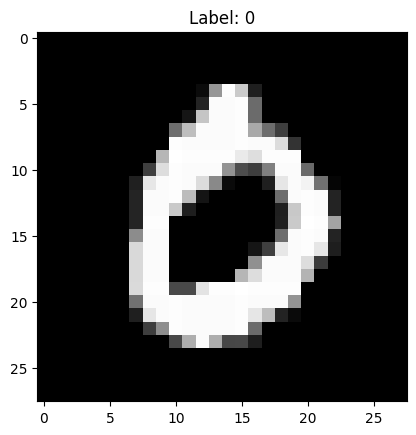

Predicted: 0


In [14]:
# Prueba con una imagen del conjunto de test
INDEX = 3
dataiter = iter(test_loader)
images, labels = next(dataiter)
imshow(images[INDEX], labels[INDEX].item()) # Mostrar la primera imagen del primer batch
output = model(images[INDEX].to(DEVICE)) # Añadir una dimensión para el batch y mover al dispositivo
_, predicted = torch.max(output.data, 1) # Obtener la predicción
print(f'Predicted: {predicted.item()}') # Mostrar la predicción

## Ejercicios

0. **Intenta restructurar el código en funciones para que sea más modular y reutilizable.** Por ejemplo, crea funciones para cargar datos, definir el modelo, entrenar y evaluar.
1. **Modificar la arquitectura de la red**: Cambia el número de capas y neuronas en la red para ver cómo afecta al rendimiento. Prueba con diferentes funciones de activación como ReLU, Sigmoid o Tanh.
2. **Experimentar con diferentes optimizadores y tasas de aprendizaje**: Prueba optimizadores como Adam o RMSprop y ajusta la tasa de aprendizaje para observar su impacto en la convergencia y el rendimiento.
3. **Ajustar el tamaño del batch**: Modifica el tamaño del batch en el DataLoader y observa cómo afecta al uso de memoria y al rendimiento del modelo.

Consejo: Apuntar todos los experimentos y resultados en una tabla para comparar fácilmente los efectos de cada cambio